# <font style="color:rgb(50,120,229)">Write a Video in OpenCV</font>

After we are done with capturing and processing the video frame by frame, the next step we would want to do is to save the video.

For images, it is straightforward. We just need to use [**`cv2.imwrite()`**](https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) and specify an image format(jpg/png). But for videos, some more info is required. 

The steps are as follows:

__1__. Create a [**`VideoWriter`**](https://docs.opencv.org/4.1.0/dd/d9e/classcv_1_1VideoWriter.html#ac3478f6257454209fa99249cc03a5c59) object

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
<VideoWriter object>	=	cv.VideoWriter(		)
<VideoWriter object>	=	cv.VideoWriter(	filename, fourcc, fps, frameSize[, isColor]	)
<VideoWriter object>	=	cv.VideoWriter(	filename, apiPreference, fourcc, fps, frameSize[, isColor]	)
```

**Parameters**
- **`filename`**: Name of the output video file.
- **`fourcc`**:	4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
- **`fps`**:	Framerate of the created video stream.
- **`frameSize`**:	Size of the video frames.
- **`isColor`**:	If it is not zero, the encoder will expect and encode color frames, otherwise it will work with grayscale frames (the flag is currently supported on Windows only).

**2**. Write frames to the object in a loop.

**3**. Close and release the object.


### <font style="color:rgb(50,120,229)">FourCC Code</font>

[FourCC](https://en.wikipedia.org/wiki/FourCC) is a 4-byte code used to specify the video codec. The list of available codes can be found at [fourcc.org](http://fourcc.org/). There are many FOURCC codes available, but in this lecture we would work only with MJPG.

#### <font style="color:rgb(200,0,0)">Note</font>
Only a few of the FourCC codes listed above will work on your system based on the availability of the codecs on your system. Sometimes, even when the specific codec is available, OpenCV may not be able to use it. **MJPG is a safe choice.**

In [10]:
# Import module
import cv2
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

In [12]:
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

In [13]:
ret, frame = cap.read()

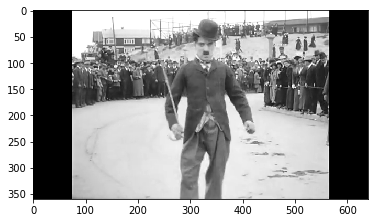

In [14]:
plt.imshow(frame[...,::-1])

In [1]:
%%HTML
<video controls>
    <source src="https://www.learnopencv.com/wp-content/uploads/2020/08/chaplin.mp4" type="video/mp4">
</video>

In [15]:
# Let's create the VideoCapture object
cap = cv2.VideoCapture(DATA_PATH+'videos/chaplin.mp4')

In [16]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
# The output is stored in 'outputChaplin.mp4' file.
out = cv2.VideoWriter('outputChaplin.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

In [17]:
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
    
  if ret == True:
    
    # Write the frame into the file 'outputChaplin.mp4'
    out.write(frame)
    
    # Wait for 25 ms before moving on to the next frame
    # This will slow down the video
    cv2.waitKey(25)
    
  # Break the loop
  else: 
    break

In [18]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out.release()